<a href="https://colab.research.google.com/github/S-in-PNW/Practical-Models-For-Predicting-Type-II-Diabetes/blob/main/Practical_Models_For_Predicting_Type_II_Diabetes_Health_and_Lifestyle_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CS310/

In [ ]:
%pip install Kaggle

In [ ]:
from google.colab import userdata
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
import kaggle

In [ ]:
!chmod 600 /root/.config/kaggle/kaggle.json

<h1 align="Left"><font color='00A2ED'>Practical Models For Predicting Type II Diabetes: Health and Lifestyle Factors</font></h1>
<p align="Left"><small><font color='00A2ED'>By Domingo Martin</font></small></p>
<p align="Left"><small><font color='00A2ED'>December 2024</font></small></p>

In this analysis, we will create a predictive dataframe that demonstrates the potential for an abbreviated predictive model where key lifestyle and health indicators could be used to streamline diabetes risk assessments. This model could be used by healthcare workers to visualize the correlation between a patient's risk of developing Type II diabetes and patient information a hospital would likely already have. Ultimately, such data-driven insights can empower clinicians to offer targeted advice and interventions for those most at risk, potentially improving outcomes in diabetic care and prevention.

<a name="i"></a>
### <h1 align="Left"><font color='00A2ED'>Table of Contents</font></h1>
- [Introduction, Libraries, and Data Preparation](#1)
- [Review of Literature](#1.1)
- [Data Exploration](#2)
  - [Discussion of the Columnar Mean, Median, and Modes](#2.1)
  - [Discussion of Qualitative Data Trends](#2.2)
- [Pearson Correlation](#3)
- [Classification and Modeling](#Classification)
  - [XGBoost](#XGBoost)
  - [Decision Tree](#DecisionTree)
  - [Random Forest](#RandomForest)
  - [Logistic Regression](#LogisticRegression)
- [Conclusion](#4)
- [Citations](#5)

<a name="1"></a>

<h1 align="center"><font color='00A2ED'>Introduction, Libraries, and Data Preparation</font></h1>

[Back to Top](#i)

[Diabetes](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) is a common chronic endocrine disease defined by the body's inability to regulate glucose concentrations in the blood. There are two forms, and the type represented in our dataset is the most common: Diabetes Type II. Type II occurs when the cells of the body won't absorb the glucose from out of the blood.

Type II Diabetes is not always caused by any one event, but can be strongly associated with many factor's in an individual's life such as body composition, zip code, education, income, race, age, and most other determinants of health. Using this dataset, we will create a predictive dataframe that healthcare workers can use to visualize the correlation between a patient's risk of diabetes and information a hospital would likely already have. To do this, we will demonstrate which risk factors have the highest correlation to diabetes risk, and whether an abbreviated dataset might be as useful in the prediction.




The selected dataset is from the year 2015 and has twenty-two attributes, each with a value and description in the table below.

| Variable            | Description           |
| ---------           | -----------           |
| `'Diabetes_012'`        | 0 = no diabetes; 1 = prediabetes; 2 = diabetes               |
|`'HighBP'` | 0 = no high BP; 1 = high BP |
|`'HighChol'` | 0 = no high cholesterol 1 = high cholesterol |
|`'CholCheck'` | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years |
|`'BMI'` | Body Mass Index |
|`'Smoker'` | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes |
|`'Stroke'` | (Ever told) you had a stroke. 0 = no 1 = yes |
|`'HeartDiseaseorAttack'` | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes |
|`'PhysActivity'` | physical activity in past 30 days - not including job 0 = no 1 = yes |
|`'Fruits'` | Consume Fruit 1 or more times per day 0 = no 1 = yes |
|`'Veggies'` | Consume Vegetables 1 or more times per day 0 = no 1 = yes |
|`'HvyAlcoholConsump'` | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per |
|`'AnyHealthcare'` | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes |
|`'NoDocbcCost'` | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes |
|`'GenHlth'` | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor |
|`'MentHlth'` | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days |
|`'PhysHlth'` | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days |
|`'DiffWalk'` | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes |
|`'Sex'` | 0 = female 1 = male |
|`'Age'` | 13-level age category: 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80 or older |
|`'Education'` | Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate) |
|`'Income'` | Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more |

Below we will import our data.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from markdown import markdown
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

In [ ]:
# kaggle.api.competition_download_file('diabetes-health-indicators-dataset', 'diabetes_012_health_indicators_BRFSS2015.csv', path='.')
%cd /content/drive/My Drive/CS310/
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

<a name="1.1"></a>
<h1 align="center"><font color='00A2ED'>Review of Literature</font></h1>

[Back to Top](#i)

In the past 20 years, there has been an influx of studies and literature on the topic of Diabetes as it has become more [commonly diagnosed](https://www.cdc.gov/diabetes/php/data-research/index.html) in the US. Therefore, literature on the topic spans multiple fields and decades. The vast majority of this literature, however, is based upon self-assessment questionaires and polling done by non-medically trained individuals. While this may increase the size of the datapool, it may create produce different outcomes from those found here, as the dataset used was filled out by inpatient individuals with the assistance of medical staff nearby.

## Lifestyle Factors in Predicting Diabetes

Lifestyle data has long been used to predict trends in healthcare data in epidemiology. In a longitudinal study done by Hu et al., over 10 years that polled more individuals than our dataset and recorded fewer attributes, focusing on smoking habits, time spent watching TV, and alcohol consumption. Patients with previous diagnoses of cardiovascular issues, cancer, and diabetes were excluded. Finally, the results of a pooled regression analysis concluded that individuals who smoked, consumed alcohol, and lived sedentary lifestyles had higher incidents of type II diabetes than those who did not. These results were controlled multiple ways in the study, controlling for BMI, age, and gender, and in each case the results were significant.

Similarly, a 2020 study performed by Silveira et al. in Brazil collected information on education level, socioeconomic status, race, age, sex, BMI, and food intake, to identify if there is a correlation to obesity and diabetes. This was a clinical study with 150 participants, which used a multivariate analysis to find that low education level and the consumption of whole grains had a negative correlations with type II diabetes, meaning those with higher education levels and lower whole grain consumption were more likely to have diabetes. The study's findings align closely with the dataset analyzed here, which also incorporates demographic, behavioral, and nutritional data.

## Creating Risk Assessments to predict Diabetes

Risk assessments are indispensable tools for predicting diabetes and performing interventions. King's 1998 study exemplifies the utility of large-scale risk evaluations. They took a 5 year poll on the concentrations of diabetic populations in rural, urban, "developing" and "developed" countries collected by the United Nations. They used this data to predict the growth and prevalence of diabetes diagnoses globally up to 2025. While the study predicted 21.5 M people, or as high as an 8% of the population, would be diagnosed with diabetes in the USA by 2025, we see as many as 38.4 M, or 11.6% of the population diagnosed today. While this study was performed on a global scale, it relates to this analysis in that it attempts to predict population incidents of diabetes. The reality that the diabetic population in the US is higher than originally predicted only reinforces the idea that we need better tools now more than ever to screen for diagnoses and provide better medical care.

Several studies have contributed significantly to the creation of diabetes risk scores. In 2007 a German study performed by Matthias et al. polled a large population for lifestyle habits including smoking, alcohol consumption, dietary compostition, body composition, height, age, and sex etc. They created a multivariate Cox regression model, and created a Risk Score based on its coefficients. The results concluded that waist circumference, height, age, hypertension, red meat consumption, whole-grain bread consumption, coffee consumption, alcohol consumption, physical activity, and smoking were all significant variables in calculating the risk score. They tested their model against three large data sets from renound studies and found that it was effective at easily assessing the risk value for german citizens developing diabetes. This is a particularly useful study, as it effectively achieves the goal of this analysis, and created an easily quantifiable risk assessment that medical professionals can use. In fact, the results of this study are now used in medical practice as the [German Diabetes Risk Score](https://www.dife.de).

Another notable study by Schwatka et al. assessed the efficacy of the Finnish Diabetes Risk Score among a working and non-working population. They assessed individuals' scores, then performed a logisitc regression on the continuous risk score for individuals at baseline as well as projected risk of devlopment of diabetes, and calculated the sensitivity and specificity of the model. Upon followup, they found that individuals with higher initial risk scores also had higher incidents of type II diabetes than those with lower risk scores. This is a significant study to include because it demonstrates the utility of an easily-accessible risk assessment of the kind we are assessing here.

## Conclusion

The existing literature provides useful insights into diabetes risk factors and prediction tools, but gaps remain. Many studies rely heavily on self-reported data, which can introduce biases and inaccuracies. Furthermore, while risk scores like Finnish and German Diabetes Risk Score have been used and validated for years, their application in non-European populations requires further study to ensure cultural and genetic relevance. Our dataset addresses some of these gaps by using clinically assisted and localized data collection, potentially enhancing its accuracy.

The reviewed studies highlight the importance of risk assessments that use easily-available data in predicting diabetes. While they lay a solid foundation, there is a clear need for tools tailored towards diverse populations and supported by clinical data. This analysis aims to build on these findings by refining risk prediction methods and expanding their applicability.




<a name="2"></a>
<h1 align="center"><font color='00A2ED'>Data Exploration</font></h1>

[Back to Top](#i)

Before greating our dataframe, we will examine the provided dataset [Diabetes](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and determine the general trends, shapes, and skews of the data. Using this information, we will determine which attributes of the data to retain, and which attributes will be unnecessary for our purposes.

First, we will confirm the number of rows and columns.

In [ ]:
# Number of rows and columns
df.shape

(253680, 22)

In [ ]:
# Check that the dataset is in the correct format
df_markdown_table = df.head().to_markdown()

|    |   Diabetes_012 |   HighBP |   HighChol |   CholCheck |   BMI |   Smoker |   Stroke |   HeartDiseaseorAttack |   PhysActivity |   Fruits |   Veggies |   HvyAlcoholConsump |   AnyHealthcare |   NoDocbcCost |   GenHlth |   MentHlth |   PhysHlth |   DiffWalk |   Sex |   Age |   Education |   Income |
|---:|---------------:|---------:|-----------:|------------:|------:|---------:|---------:|-----------------------:|---------------:|---------:|----------:|--------------------:|----------------:|--------------:|----------:|-----------:|-----------:|-----------:|------:|------:|------------:|---------:|
|  0 |              0 |        1 |          1 |           1 |    40 |        1 |        0 |                      0 |              0 |        0 |         1 |                   0 |               1 |             0 |         5 |         18 |         15 |          1 |     0 |     9 |           4 |        3 |
|  1 |              0 |        0 |          0 |           0 |    25 |        1 |        0 |                      0 |              1 |        0 |         0 |                   0 |               0 |             1 |         3 |          0 |          0 |          0 |     0 |     7 |           6 |        1 |
|  2 |              0 |        1 |          1 |           1 |    28 |        0 |        0 |                      0 |              0 |        1 |         0 |                   0 |               1 |             1 |         5 |         30 |         30 |          1 |     0 |     9 |           4 |        8 |
|  3 |              0 |        1 |          0 |           1 |    27 |        0 |        0 |                      0 |              1 |        1 |         1 |                   0 |               1 |             0 |         2 |          0 |          0 |          0 |     0 |    11 |           3 |        6 |
|  4 |              0 |        1 |          1 |           1 |    24 |        0 |        0 |                      0 |              1 |        1 |         1 |                   0 |               1 |             0 |         2 |          3 |          0 |          0 |     0 |    11 |           5 |        4 |
|  ... |              ... |        ... |        ... |        ... |  ... |       ... |   ... |        ... |       ... |   ... |     ... |                   ... |          ... |        ... |   ... |   ... |   ... |  ... | ... |    ... |         ... |      ... |

Now we have confirmed that we have 253680 rows, 22 columns, and that they are in the appropriate format for our purpose. This data was previously cleaned of any null data, but we will do it again here to ensure consistency. Then, we will remove the irrelevant rows and columns. Finally, for the quantitative variables, we will explore the data's mean, median, mode, and variance, and find any outliers.

In [ ]:
# Clean the data of any null values - removes 0 values
df.dropna()
df.shape

(253680, 22)

For the purpose of this project, we will only be using information that a hospital would be likely to have. Therefore, the following attributes will be **<font color='green'>included</font>** in our dataset, as these are all questions that are answered during most patient intake consultations.
> Diabetes, HighBP, HighCol, CholCheck, Bmi, Smoker, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump, AnyHealthcare, GenHlth, MentHlth, DiffWalk, Sex, Age

The following attributes will be **<font color='red'>excluded</font>** of our dataset, as they are not common questions a healthcare provider would ask during intake or examination, and therefore would not be helpful in deterining the diabetes risk factors for a patient:
> PhysActivity, Fruits, Veggies, NoDocbcCost, PhysHlth, Education, Income

In [ ]:
# Remove columns 9, 10, 11, 14, 17, 21, and 22
cleanedData = df.drop(labels = ['PhysActivity', 'Fruits', 'Veggies', 'NoDocbcCost', 'PhysHlth', 'Education', 'Income'], axis = 1)
cleanedData.shape

(253680, 15)

In [ ]:
# Remove rows where Diabetes_012 = 1 (prediabetes) - Removes 4,631 rows
finalCleanedData = cleanedData[cleanedData['Diabetes_012'] != 1]
finalCleanedData.shape

(249049, 15)

In [ ]:
# Create a temporary database for the quantitative variables
quantatativeData = finalCleanedData[['BMI', 'GenHlth', 'MentHlth', 'Age']]
quantatativeData.head().to_markdown()

Quantitative DataSet

|    |   BMI |   GenHlth |   MentHlth |   Age |
|---:|------:|----------:|-----------:|------:|
|  0 |    40 |         5 |         18 |     9 |
|  1 |    25 |         3 |          0 |     7 |
|  2 |    28 |         5 |         30 |     9 |
|  3 |    27 |         2 |          0 |    11 |
|  4 |    24 |         2 |          3 |    11 |
|... |   ... |       ... |        ... |   ... |

In [ ]:
# Find the mean of all column values
dataMean = quantatativeData.mean(0)
dataMean.to_markdown()

Mean of Quantitative Data

|          |   Value  |
|:---------|---------:|
| BMI      | 28.3388  |
| GenHlth  |  2.50276 |
| MentHlth |  3.15976 |
| Age      |  8.01257 |

In [ ]:
# Finding the median
dataMedian = quantatativeData.median(0)
#dataMedian.to_markdown()

Median of Quantitative Data

|          | Value |
|:---------|----:|
| BMI      |  27 |
| GenHlth  |   2 |
| MentHlth |   0 |
| Age      |   8 |

In [ ]:
# Finding the mode
dataMode = quantatativeData.mode(0)
#dataMode.to_markdown()

Mode of Quantitative Data

|    |   BMI |   GenHlth |   MentHlth |   Age |
|---:|------:|----------:|-----------:|------:|
|  0 |    27 |         2 |          0 |     9 |

In [ ]:
# Finding the variance of each column
dataVariance = quantatativeData.var(0)
#dataVariance.to_markdown()

Variance of Quantitative Data

|          |    Value |
|:---------|---------:|
| BMI      | 43.4812  |
| GenHlth  |  1.13915 |
| MentHlth | 54.4662  |
| Age      |  9.35191 |

In [ ]:
# Checking min and max values to compare
minValues = quantatativeData.min(0)
maxValues = quantatativeData.max(0)
#minValues.to_markdown()
#maxValues.to_markdown()

Minimum and Maximum Quantities of the Quantitative Data

|              |Value|
|:-------------|----:|
| Min BMI      |  12 |
| Max BMI      |  98 |
| Min GenHlth  |   1 |
| Max GenHlth  |   5 |
| Min MentHlth |   0 |
| Max MentHlth |  30 |
| Min Age      |   1 |
| Max Age      |  13 |





<a name="2.1"></a>
## Discussion of the Columnar Mean, Median, and Modes

[Back to Top](#i)

In our data, each column has different types of variables with different meanings for their respective measures of tendency. For instance, the variable BMI has a mean of ~28.3, which is a common value for that variable. GenHlth, however, has a mean of ~2.5, which would be considered "very good" to "good" in this study. We can also see that age was a value of ~8, meaning the average age was of people between the ages of 55 to 59.

Looking at the medians in our data, they seem to be relatively consistent with what we learned from the mean. The median BMI is slightly lower than the mean, and both values are [considered overweight](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html) (note that BMI can be an effective general indicator of overall health, but its efficacy must be determined on a case-by-case basis). There were no significant differences in the mean and median for any values.

The mode for our data is mostly consistent with the mean and median. The only notable difference between median and mode is the age, which falls in the 8 category for median, and 9 category for the mode. Therefore, where the median age is between 55-59, the mode age is between 60-65.

When considering variation, there seems to be a few outliers (more than two standard deviations away from the mean) for every value except Age, which is to be expected. Notably, BMI and MentHlth have very large variation, which is not necessarily explained by the mean, median, or mode, as all those values are within a few values of eachother. We will examine these and identify the outliers better by plotting them first in a box and whisker plot, then as a histogram to get a good visualization of the distribution of this data.

In [ ]:
# Plot the box and whisker plots, grouping similar data values to the same plot

trace0 = go.Box(
    y=quantatativeData['GenHlth'],
    name = 'General Health',
    marker = dict(
        color = 'rgb(109, 213, 214)',
    )
)
trace1 = go.Box(
    y=quantatativeData['Age'],
    name = 'Age Category',
    marker = dict(
        color = 'rgb(106, 79, 184)',
    )
)
trace2 = go.Box(
    y=quantatativeData['MentHlth'],
    name = 'Mental Health',
    xaxis='x2',
    yaxis='y2',
    marker = dict(
        color = 'rgb(100, 50, 142)',
    )
)
trace3 = go.Box(
    y=quantatativeData['BMI'],
    name = 'Body Mass Index',
    xaxis='x3',
    yaxis='y3',
    marker = dict(
        color = 'rgb(87, 32, 99)',
    )
)
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.28]
    ),
    yaxis=dict(
        domain=[0,  1],
        title="Score"
    ),
    xaxis2=dict(
        domain=[0.38, 0.61]
    ),
    xaxis3=dict(
        domain=[0.71, 1],
        anchor='y3'
    ),
    yaxis2=dict(
        domain=[0,  1],
        anchor='x2',
        title="Score"
    ),
    yaxis3=dict(
        domain=[0, 1],
        anchor='x3',
        title="Score"
    ),
    title = 'Relevant Plots of the Quantatative Values GenHlth, MentHlth, Age, and BMI',
    legend_title_text='Attribute'
)
data = [trace0, trace1, trace2, trace3]
fig=go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Our Box and whisker plots revel something our min/max values hinted at when comparing to our tendency data: we have many values that depart more than to standard deviations from the mean. In this case, GenHlth has only one index 5 (poor general health) as an outlier. Meanwhile, MentHlth and BMI have many high outliers. we will now plot a histogram of just BMI and MentHlth to better understand this tendency.

In [ ]:
# Plot histograms of BMI and MentHlth
# Plot a simple distribution of the desired columns

trace1 = go.Scatter(
    x=np.arange(1, 31),
    y=quantatativeData.groupby('MentHlth').size(),
    name = "Mental Health",
    marker = dict(
        color = 'rgb(104, 62, 164)',
    ),
)
trace2 = go.Scatter(
    x=np.arange(0, 101),
    y=quantatativeData.groupby('BMI').size(),
    name = "BMI",
    marker = dict(
        color = 'rgb(109, 213, 214)',
    ),
    xaxis='x2',
    yaxis='y2',
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        title="Self-Reported Rating"
    ),
    yaxis=dict(
        domain=[0, 1],
        title="No. Reports"
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        title="Self-Reported Rating"
    ),
    yaxis2=dict(
        domain=[0, 1],
        anchor='x2',
        title="No. Reports"
    ),
    title = 'Distributions of Reported Mental Health Quality and BMI',
    legend_title_text='Attribute'
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

As suspected, both of the datasets are severely right-skewed, which explains the large number of outliers observed in our box plots. In considering these outliers, some observations can be made about their inclusion in our data. The outlier data is not likely to be the result of measurement errors, nor reported accidentally. All of the data is within an expected range for members of the study. Looking at the data, is it unlikely that outliers will change the outcome of projections, since there is such high density around the mean. For these reasons, outliers will not be excluded in this project.

<a name="2.2"></a>
## Discussion of Qualitative Data Trends

[Back to Top](#i)

The majority of the values conducted in this study were reported as true or false, and can be visualized as so. Below, we will identify some trends of our data comparing diabetic vs non-diabetic distributions of co-morbidities.

In [ ]:
# Create a temporary database for the qualitative variables
qualitativeVars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',	'Stroke',	'HeartDiseaseorAttack',	'HvyAlcoholConsump', 'AnyHealthcare', 'DiffWalk']
qualitativeData = finalCleanedData[qualitativeVars]
qualitativeData.shape

(249049, 10)

In [ ]:
# Split the data into diabetic and non-diabetic sets

diabeticData = qualitativeData[qualitativeData['Diabetes_012'] == 2]
diabeticData = diabeticData.drop(labels = ['Diabetes_012'], axis = 1)
print(diabeticData.shape)

nonDiabeticData = qualitativeData[qualitativeData['Diabetes_012'] == 0]
nonDiabeticData = nonDiabeticData.drop(labels = ['Diabetes_012'], axis = 1)
print(nonDiabeticData.shape)

(35346, 9)
(213703, 9)


In [ ]:
# prepare data frames
diabeticDataSum = diabeticData.sum(0)
diabeticDataPercentage = (diabeticDataSum / diabeticData.count())*100
nonDiabeticDataSum = nonDiabeticData.sum(0)
nonDiabeticDataPercentage = (nonDiabeticDataSum / nonDiabeticData.count())*100

# import graph objects as "go"
import plotly.graph_objs as go
# create trace1
trace1 = go.Bar(
                x = diabeticDataPercentage.keys(),
                y = diabeticDataPercentage,
                name = "Diabetic",
                marker = dict(color = 'rgba(104, 62, 164, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = diabeticDataPercentage.round(1))
# create trace2
trace2 = go.Bar(
                x = nonDiabeticDataPercentage.keys(),
                y = nonDiabeticDataPercentage,
                name = "Non-Diabetic",
                marker = dict(color = 'rgba(109, 213, 214, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = nonDiabeticDataPercentage.round(1))
data = [trace1, trace2]
layout = go.Layout(barmode = "group",
                     title = "Percent of Reported Characteristics for Diabetic VS Non-Diabetic Respondents",
                     xaxis_title="Co-Morbidity",
                    yaxis_title="Percentage",
                    legend_title_text='Population'
)
fig = go.Figure(data = data, layout = layout)
fig.show(renderer="colab")

Looking at this graph, it becomes evident that the majority diabetic respondants have checked their cholesterol, had healthcare, have a high BP, have high cholesterol, and smoke. A minority of respondants have ahd a stroke, difficulty walking, have had a cardiac incident, or heavily consume alcohol. In contrast, the graph for non-diabetics is noticably different. Immediately, there seems to be similar rates of cholesterol checks and healthcare, but only a minority of non-diabetic respondants report high BP, choleterol, and smoking tendencies.

In [ ]:
# Finding the differences in percentage for the two data pools
dataDifferences = abs(nonDiabeticDataPercentage - diabeticDataPercentage)
#dataDifferences.to_markdown()

Differences in Percentage in Data Pools

|                      |    Value |
|:---------------------|---------:|
| HighBP               | 38.1542  |
| HighChol             | 29.0947  |
| CholCheck            |  3.60777 |
| Smoker               |  8.85394 |
| Stroke               |  6.08294 |
| HeartDiseaseorAttack | 15.1049  |
| HvyAlcoholConsump    |  3.83041 |
| AnyHealthcare        |  1.00305 |
| DiffWalk             | 23.8934  |

As we can observe from comparing the graphs, some values are significantly different for non-diabetics than for diabetics. For instance, CholCheck is noticeably high, meaning that most people in the study had their cholesterol levels checked in the five years before the study. This is data we can likely leave out, as most standard labs would check cholesterol levels for yearly checkups.

Some variables are notably different between respondents, however. From our data, we can observe that non-diabetic respondents have much lower reports of difficulty walking, high blood pressure, and high cholesterol.

If we look at the differences in the data, we can better understand which variables may be omitted from our study. In the 'differences' table above, we can tell with more certainty that there is significant variation between our two data pools. For the purpose of this study, we will omit any variables with \<5% difference in the diabetic and non-diabetic data. Therefore, the following variables are to be omitted:
> CholCheck, HvyAlcoholConsump, AnyHealthcare

<a name="3"></a>

<h1 align="center"><font color='00A2ED'>Pearson Correlation</font></h1>

[Back to Top](#i)


For the purpose of this project, we will be focusing specifically on diabetes, and any rows containing information for prediabetes will be omitted. We will only be using information that a hospital would be likely to have. Therefore, we will be omitting all attributes that would not be helpful in deterining the diabetes risk factors for a patient attending a typical healthcare facility. Furthermore, when assessing the quantitatively measured attributes in our dataframe, the outlier data is not likely to be the result of measurement errors, nor reported accidentally. All of the data is within an expected range for members of the study, and when looking at the data, is it unlikely that outliers will change the outcome of projections. For these reasons, quantitative outliers will not be excluded in this project. For qualitatively measured attributes, we will omit any variables with \<5% difference in the diabetic and non-diabetic data.

The following variables are to be omitted

> Diabetes_012[value = 1], PhysActivity, Fruits, Veggies, NoDocbcCost, PhysHlth, Education, Income, CholCheck, HvyAlcoholConsump, AnyHealthcare

Below, we will create a cleaned dataframe containing our desired datapoints.

In [ ]:
cleanedData = df.drop(labels = ['PhysActivity', 'Fruits', 'Veggies',
                                'NoDocbcCost', 'PhysHlth', 'Education',
                                'Income', 'CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare'], axis = 1)
cleanedData = cleanedData[cleanedData['Diabetes_012'] != 1]
cleanedData['Diabetes_012'] = cleanedData['Diabetes_012'].replace(2, 1)
cleanedData.shape

(249049, 12)

In order to calculate the correlations between our datapoints using a Pearson Correlation, we will first need to normalize the data since none of the data has a normal distribution. Because of our large data pool, both the qualitative and quantitative data can be normalized using the same method.

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cleanedData_standardized = pd.DataFrame(standard_scaler.fit_transform(cleanedData), columns=cleanedData.columns)
#cleanedData_standardized.head().to_markdown()

|    |   Diabetes_012 |    HighBP |   HighChol |        BMI |    Smoker |    Stroke |   HeartDiseaseorAttack |   GenHlth |   MentHlth |   DiffWalk |       Sex |       Age |
|---:|---------------:|----------:|-----------:|-----------:|----------:|----------:|-----------------------:|----------:|-----------:|-----------:|----------:|----------:|
|  0 |      -0.406691 |  1.16249  |   1.17402  |  1.76845   |  1.12302  | -0.204817 |              -0.320726 |  2.33976  |  2.01084   |   2.2399   | -0.887109 |  0.322891 |
|  1 |      -0.406691 | -0.860223 |  -0.851773 | -0.50634   |  1.12302  | -0.204817 |              -0.320726 |  0.465883 | -0.428146  |  -0.446449 | -0.887109 | -0.331113 |
|  2 |      -0.406691 |  1.16249  |   1.17402  | -0.0513819 | -0.890453 | -0.204817 |              -0.320726 |  2.33976  |  3.63684   |   2.2399   | -0.887109 |  0.322891 |
|  3 |      -0.406691 |  1.16249  |  -0.851773 | -0.203034  | -0.890453 | -0.204817 |              -0.320726 | -0.471056 | -0.428146  |  -0.446449 | -0.887109 |  0.976895 |
|  4 |      -0.406691 |  1.16249  |   1.17402  | -0.657992  | -0.890453 | -0.204817 |              -0.320726 | -0.471056 | -0.0216474 |  -0.446449 | -0.887109 |  0.976895 |
|  ... |              ... |        ... |        ... |        ... |  ... |       ... |   ... |        ... |       ... |   ... |     ... |                   ... |          ... |        ... |   ... |   ... |   ... |  ... | ... |    ... |         ... |      ... |

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "none"

N = 12
corr = cleanedData_standardized.corr().round(2)

labels = corr.keys()
X = [labels[k] for k in range(N)]
hovertext = [[f'corr({X[i]}, {X[j]})= {corr.iloc[i][j]:.2f}' if i>j else '' for j in range(N)] for i in range(N)]

heat = go.Heatmap(z=corr.values,
                  x=X,
                  y=X,
                  xgap=1, ygap=1,
                  colorscale='Dense',
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext =hovertext,
                  hoverinfo='text'
                   )


title = 'Correlation Matrix'

layout = go.Layout(title_text=title, title_x=0.5,
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')

fig=go.Figure(data=[heat], layout=layout)
fig.show(renderer="colab")

To interpret the numerical results of our heat map, we will use the generally accepted values for correlation:

<p align="center">

|    \|r\|             | Interpretation    |
| ---------            | -----------       |
|    0.00 < 0.10       | Negligable        |
|    0.10 < 0.20       | Weak              |
|    0.20 < 0.40       | Moderate          |
|    0.40 < 0.60       | Relatively Strong |
|    0.60 < 0.80       | Strong            |
|    0.80 <= 1.00      | Very Strong       |

</font></p>


Above, we can see that there are only positive correlations between our co-morbid attributes and diabetes. All of the highest correlations are moderate, the highest being between diabetes and general health. As the value for GenHlth goes up (in this case, representing worsening health accoring to our [key](#1)) then the tendency for diabetes goes up.

Furthermore, having high blood pressure, high cholesterol, a high BMI, and difficulty walking are all positively correlated with diabetes, meaning that as these conditions are identified, they are moderately associated with with having diabetes as a concurrent condition.

Having a stroke, a history of heart disease or heart attack, and being plder are all weakly assiciated with having diabetes, while being a smoker, having low mental health, and your sex are all negligably correlated with diabetes.

<a name="Classification"></a>

<h1 align="center"><font color='00A2ED'>Classification and Modeling</font></h1>

[Back to Top](#i)

We will use our dataset to develop a model that accurately predicts a type II diabetes diagnosis. We will test four common models for classification:

- [XGBoost](#XGBoost)
- [Decision Tree](#DecisionTree)
- [Random Forest](#RandomForest)
- [Logistic Regression](#LogisticRegression)

To assess the performance of the models developed in this study, two key metrics were used: accuracy score and F1 score. The accuracy score provides a straightforward measure of the general performance of the model by calculating the proportion of correctly classified instances out of the total dataset. This metric is useful for comparing overall effectiveness across models and identifying the best-performing algorithms in terms of predictive capability.

However, in clinical applications, accuracy alone may not be sufficient. For predicting type II diabetes, the F1 score was chosen as a critical evaluation metric because it balances precision (the proportion of correctly identified positive cases) and recall (the proportion of actual positive cases correctly identified). This balance is particularly important in healthcare, where the cost of false negatives—missed diagnoses—can be significant. The F1 score ensures that models are not only accurate but also reliable in minimizing the likelihood of critical diagnostic errors.

Using these metrics, the models were evaluated to determine their suitability for predicting type II diabetes in a clinical context.

In [ ]:
# Define target variable and features
X = cleanedData.drop('Diabetes_012',axis=1)
y = cleanedData['Diabetes_012']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Model: XGBoost Modeling
<a name="XGBoost"></a>

We will first create an XGBoost model for our data. XGBoost is useful for its XGBClassifier function which is reliable and efficient for classification.

In [ ]:
import xgboost as xgb

# Create XGBoost classifier
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_pred_out = model.predict(X_test)

# Evaluate model
accuracy_out = accuracy_score(y_test, y_pred_out)
print("Accuracy Out:", accuracy_out)

# Make predictions
y_pred_in = model.predict(X_train)

# Evaluate model
accuracy_in = accuracy_score(y_train, y_pred_in)
print("Accuracy In:", accuracy_in)

f1 = f1_score(y_test, y_pred_out)
print("F1 Score:", f1)

Accuracy Out: 0.8665529010238908
Accuracy In: 0.8664367919935354
F1 Score: 0.2755313351498638


This XGBoost Model has **86.65%** accuracy in test, and **86.64%** in training. Because they are within 0.01% of eachother, this model is likely underfitting, as we are looning for a 95% accuracy from an effective model. Most notably, the recall score for this model is very low at **0.28**, meaning that there is a high proportion of false negatives.

## Model: Decision Tree
<a name="DecisionTree"></a>

The decision tree model will be tested in and out of sample, then evaluated. While the XGBoost model is useful for specificity, a decision tree may provide better interpretability and reliability, courtesy of its own simplicity.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a single decision tree
tree = DecisionTreeClassifier(max_depth = 4, random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)

# Predict on the test set
y_pred_test = tree.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy:.5f}")

# Evaluate accuracy in-sample
y_pred_train = tree.predict(X_train)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on the training set: {accuracy:.5f}")

# F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

Accuracy on the test set: 0.71869
Accuracy on the training set: 0.71712
F1 Score: 0.42933941516657165


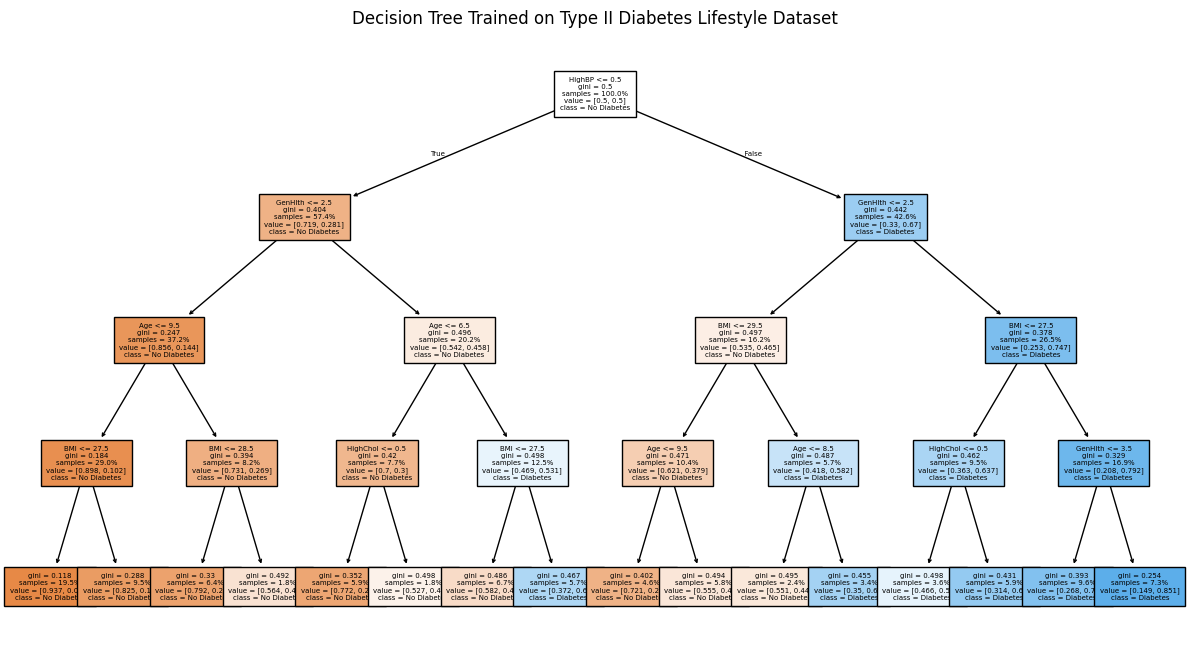

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['No Diabetes','Diabetes'],
    filled=True,
    proportion = True,
    fontsize=5,
)
plt.title("Decision Tree Trained on Type II Diabetes Lifestyle Dataset")
plt.show()

As shown above, the accuracy of the best decision tree in-sample is **71.71%**, and the accuracy out of sample is **71.87%**. These results are within 1% of eachother, but are still underfits the data too much to be effective. The F1 score is **0.42** for this model, which we classify as very low.

## Model: Random Forest Classification
<a name="RandomForest"></a>
Now we will explore how a random Forest Classification model for identifying type II diabetes, and will gauge its efficacy using the Area Under Curve (AUC) of a Receiver-operating characteristic (ROC) curve.

AUC: 0.76


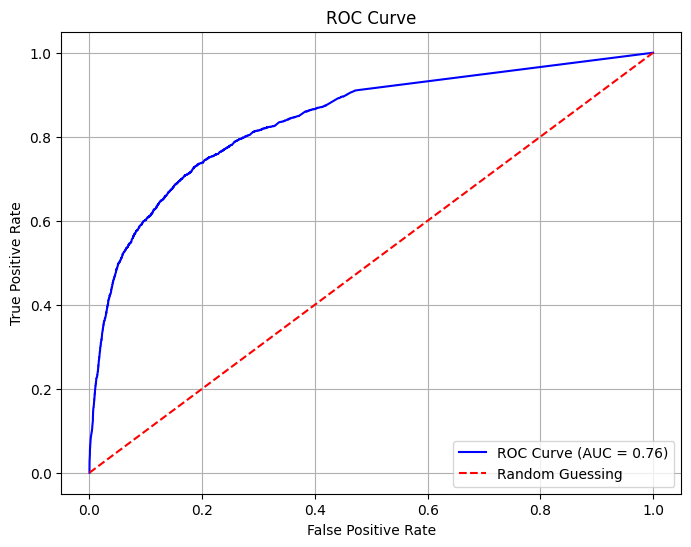

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Calculate the false positive and true positive rates
y_probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_pred_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Our ROC curve has an Area under Curve (AUC) of 0.76, meaning that this random forest model has a 76% probability of correctly identifying type II diabetes from given data. This is lower than our XGBoost model, and less effective.

## Model: Logistic Regression
<a name="LogisticRegression"></a>
The final model we will explore is a Logistic Regression. This model is imporant to include because of its wide use in medical research, and its longstanding status as a "gold standard".

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make in-sample predictions
y_pred_in = pipeline.predict(X_train)
accuracy_in = accuracy_score(y_train, y_pred_in)
print("Accuracy in-sample: ", accuracy_in)

# Make out-of-sample predictions
y_pred_out = pipeline.predict(X_test)
accuracy_out = accuracy_score(y_test, y_pred_out)
print("Accuracy out-of-sample: ", accuracy_out)

# F1 score
f1 = f1_score(y_test, y_pred_out)
print("F1 Score:", f1)

Accuracy in-sample:  0.8616837065032449
Accuracy out-of-sample:  0.8620758883758282
F1 Score: 0.2506544502617801


This logistic Regression Model has **86.16%** accuracy in test, and **86.20%** in training. Because they are within 0.1% of eachother, this model is likely underfitting. The F1 score for this model is **0.25**, which we will classify as very low.

## Model Evaluation
Below is a summary of our findings for each model trained on this dataset

|    Model  | In-Test Accuracy | In-Set Accuracy |F1 Score |AUC Score |
|:----------|-----------------:|----------------:|--------:|---------:|
| [XGBoost](#XGBoost)  | 86.65%           |  86.64%         |0.28| -- |
| [Decision Tree](#DecisionTree)| 71.71%    |  71.87%       |0.42| -- |
| [Random Forest](#RandomForest)| --      |  --     |   --     |0.76|
| [Logistic Regression](#LogisticRegression)| 86.16%  |  86.20%  | 0.25 | -- |



We explored several models to classify type II diabetes, including XGBoost, decision tree, random forest, and logistic regression, each offering unique strengths and limitations.

The **XGBoost model** demonstrated reliable performance with an accuracy of **86.65%** in the test set and **86.64%** in training. However, the minimal difference between these accuracies suggests the model is underfitting, as we aim for an accuracy closer to **95%** for an effective classifier. Most notably, the recall score of **0.28** indicates a high proportion of false negatives, which is particularly problematic in a healthcare setting where missed diagnoses can have serious consequences. While XGBoost is computationally efficient and robust for classification, its low recall limits its utility for this task.

The **decision tree model**, while simple and interpretable, underperformed in both in-sample and out-of-sample accuracy, achieving **71.71%** and **71.87%**, respectively. The minimal difference between these accuracies suggests underfitting, and its low F1 score of **0.42** highlights insufficient balance between precision and recall.

The **random forest model**, evaluated using the AUC of the ROC curve, achieved an AUC of **0.76**, indicating moderate discriminatory ability. However, this was lower than the XGBoost model's performance, limiting its usefulness for this dataset.

Finally, the **logistic regression model**, a longstanding "gold standard" in medical research, achieved high accuracy with **86.16%** on the test set and **86.20%** on the training set. Despite its consistency, the extremely low F1 score of **0.25** suggests that it too struggles to balance recall and precision, likely due to the dataset's imbalanced class distribution.

Overall, while accuracy metrics for most models were relatively high, they fail to sufficiently prioritize minimizing false negatives, a critical requirement for predicting type II diabetes in clinical applications. The use of F1 score as a balanced metric was essential to capture this limitation. Moving forward, further optimization or exploration of alternative modeling approaches is necessary to achieve a model that effectively mitigates false negatives while maintaining robust performance.

Though the best model is up to debate. Based on the evaluation of the models, XGBoost stands out as the best-performing model despite its limitations. With an accuracy of 86.65% on the test set and 86.64% in training, it achieves the highest accuracy among all the models evaluated. Although it is underfitting and has a low recall score of 0.28, XGBoost's ability to handle complex datasets and deliver consistent results makes it a strong candidate for further optimization. Unlike the logistic regression model, which also demonstrates high accuracy but suffers from an even lower F1 score, XGBoost offers a better starting point for refining recall without sacrificing precision. Its robustness and efficiency make it the most promising model for improving diabetes prediction with additional tuning or adjustments to address false negatives.

<a name="4"></a>

<h1 align="center"><font color='00A2ED'>Conclusion</font></h1>

[Back to Top](#i)

This analysis reveals that multiple health and lifestyle factors are associated with Type II diabetes risk, with varying degrees of correlation. Among the strongest associations were poor general health, high blood pressure, high cholesterol, elevated BMI, and difficulty walking, all of which exhibit moderate positive correlations with diabetes. These findings suggest that these factors may serve as useful indicators for healthcare professionals assessing a patient's risk of developing type II diabetes.

Interestingly, other factors such as age, history of stroke, and heart disease displayed only weak associations with diabetes, and factors like smoking, mental health, and sex showed minimal correlation. This suggests that while these variables may play a role in diabetes onset, they are less predictive in this dataset than the more highly correlated factors.

From a modeling perspective, XGBoost emerged as the best-performing model, achieving the highest accuracy of 86.65% on the test set and 86.64% in training. Despite underfitting and a low recall score of 0.28, its robustness and efficiency make it a strong candidate for further optimization. Unlike the other models, which also demonstrated high accuracy but suffered from even lower F1 scores, XGBoost offers a more promising foundation for improving recall without compromising precision. With additional tuning, it has the potential to significantly enhance diabetes prediction while minimizing false negatives—an essential consideration in clinical applications.


In practical application, our results support the potential for an abbreviated predictive model, where key indicators such as general health, blood pressure, cholesterol, and BMI could help streamline diabetes risk assessments. By focusing on these core factors, healthcare providers may gain a clearer view of a patient's likelihood of developing Type II diabetes. Ultimately, such data-driven insights can empower clinicians to offer targeted advice and interventions for those most at risk, potentially improving outcomes in diabetic care and prevention.

While these results demonstrate the feasibility of creating a predictive model, they also highlight the need for continued refinement and exploration to enhance the model’s clinical applicability and efficacy.

<a name="5"></a>

<h1 align="center"><font color='00A2ED'>Citations</font></h1>

[Back to Top](#i)

- “Adult BMI Categories.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 19 Mar. 2024, www.cdc.gov/bmi/adult-calculator/bmi-categories.html.

- Hilary King, Ronald E Aubert, William H Herman; "Global Burden of Diabetes, 1995-2025: Prevalence, numerical estimates, and projections". Diabetes Care 1 September 1998; 21 (9): 1414-1431. https://doi.org/10.2337/diacare.21.9.1414.

- Hu FB, Leitzmann MF, Stampfer MJ, Colditz GA, Willett WC, Rimm EB. "Physical Activity and Television Watching in Relation to Risk for Type 2 Diabetes Mellitus in Men". Arch Intern Med. 2001;161(12):1542-1548. doi:10.1001/archinte 161.12.1542.

- Matthias B. Schulze, Kurt Hoffmann, Heiner Boeing, Jakob Linseisen, Sabine Rohrmann, Matthias Möhlig, Andreas F.H. Pfeiffer, Joachim Spranger, Claus Thamer, Hans-Ulrich Häring, Andreas Fritsche, Hans-Georg Joost; "An Accurate Risk Score Based on Anthropometric, Dietary, and Lifestyle Factors to Predict the Development of Type 2 Diabetes". Diabetes Care 1 March 2007; 30 (3): 510–515. https://doi.org/10.2337/dc06-2089

- Schwatka NV, Smith DE, Golden A, Tran M, Newman LS, Cragle D. "Development and validation of a diabetes risk score among two populations". PLoS One. 2021 Jan 25;16(1):e0245716. doi: 10.1371/journal.pone.0245716. PMID: 33493190; PMCID: PMC7833146.

- Silveira, E.A.; de Souza Rosa, L.P.; de Carvalho Santos, A.S.e.A.; de Souza Cardoso, C.K.; Noll, M. "Type 2 Diabetes Mellitus in Class II and III Obesity: Prevalence, Associated Factors, and Correlation between Glycemic Parameters and Body Mass Index". Int. J. Environ. Res. Public Health 2020, 17, 3930. https://doi.org/10.3390/ijerph17113930

- Teboul, Alex. “Diabetes Health Indicators Dataset.” Kaggle, 8 Nov. 2021, www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset.

- "National Diabetes Statistics Report" Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 15 May. 2024, https://www.cdc.gov/diabetes/php/data-research/index.html.